In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()


170508288/170498071 [==============================] - 3s 0us/step


In [4]:
print(x_test.shape)
print(x_train.shape)

(10000, 32, 32, 3)
(50000, 32, 32, 3)


In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

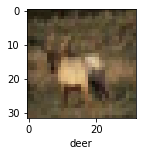

In [9]:
plot_sample(x_train,y_train,3)

In [11]:
x_train=x_train/255
x_test=x_test/255

In [13]:

cnn=models.Sequential([
          layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
          layers.MaxPooling2D((2,2)),

          layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
          layers.MaxPooling2D((2,2)),

          layers.Flatten(),
          layers.Dense(64,activation='relu'),
          layers.Dense(10,activation='softmax')                       
])

In [15]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [16]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 67s 42ms/step - loss: 1.4667 - accuracy: 0.4725
Epoch 2/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.1187 - accuracy: 0.6088
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9924 - accuracy: 0.6569
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9098 - accuracy: 0.6848
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8495 - accuracy: 0.7069
Epoch 6/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7882 - accuracy: 0.7260
Epoch 7/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.7447 - accuracy: 0.7419
Epoch 8/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.6982 - accuracy: 0.7567
Epoch 9/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.6616 - accuracy: 0.7698
Epoch 10/10
1563/1563 [==============================] - 66s 42m

In [17]:
cnn.evaluate(x_test,y_test,1)

10000/10000 [==============================] - 21s 2ms/step - loss: 0.9313 - accuracy: 0.6974


[0.9313111305236816, 0.6973999738693237]

In [18]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

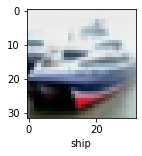

In [19]:
plot_sample(x_test,y_test,1)

In [20]:
y_pred=cnn.predict(x_test)
y_pred[:5]

array([[1.4137832e-03, 3.8593149e-05, 3.7898554e-03, 9.4525504e-01,
        3.8031378e-04, 3.8136698e-02, 6.4357226e-03, 2.2417571e-06,
        4.5304159e-03, 1.7355094e-05],
       [3.1240964e-03, 1.8842797e-03, 7.1914674e-06, 7.4989208e-07,
        1.4045379e-07, 8.0203122e-10, 5.1079491e-10, 1.6225660e-09,
        9.9498183e-01, 1.7844781e-06],
       [9.2760520e-03, 2.4145026e-02, 5.3421117e-04, 1.0470180e-03,
        1.1400873e-04, 5.5563472e-05, 3.7054822e-05, 5.2869382e-05,
        9.6372747e-01, 1.0106381e-03],
       [9.6622002e-01, 4.4543799e-03, 8.2346955e-03, 4.5996971e-04,
        1.6838805e-04, 1.1639081e-05, 1.9175039e-05, 6.0527063e-06,
        2.0385627e-02, 4.0135208e-05],
       [2.2514679e-07, 5.2487419e-05, 7.0025059e-03, 1.1367749e-02,
        1.4388043e-01, 5.3077773e-03, 8.3232111e-01, 6.9916105e-08,
        6.7710731e-05, 1.9486158e-08]], dtype=float32)

In [21]:
y_classes=[np.argmax(i) for i in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [22]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

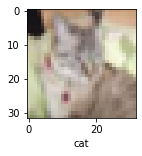

In [32]:
plot_sample(x_test,y_test,8)

In [33]:
classes[y_classes[8]]

'cat'